# **Import & Install Library**

In [1]:
import sys

import tensorflow
import pandas as pd
import sklearn as sk
import tensorflow as tf

check_gpu = len(tf.config.list_physical_devices('GPU'))>0

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print("GPU is", "available" if check_gpu \
      else "NOT AVAILABLE")

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

Tensor Flow Version: 2.4.1
Keras Version: 2.4.0

Python 3.7.10 (default, Feb 26 2021, 13:06:18) [MSC v.1916 64 bit (AMD64)]
Pandas 1.2.4
Scikit-Learn 0.24.1
GPU is available
Num GPUs Available:  1
1 Physical GPUs, 1 Logical GPUs


In [2]:
#Import library preprocessing
#from google.colab import files
import time
import random as rd
import zipfile, os # Library untuk mendownload zipfile
from tqdm import tqdm # Sebagai pemanis visual saat mengimport gambar ke dalam array list
import numpy as np  # Library untuk mengubah gambar menjadi array
import tensorflow as tf # Library Tensorflow
from tensorflow.keras.optimizers import RMSprop # Mengimport optimizer untuk model
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Library untuk Augmentasi gambar
from tensorflow.keras import regularizers # Library untuk mencegah overfitting pada model
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint # Mengimport learningrate dan model checkpoint
from sklearn.preprocessing import LabelEncoder # Untuk mengubah index menjadi string label
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical # Untuk melabeli gambar
import cv2 # Mengimport gambar

#Import library visualisasi
import matplotlib.image as mpimg  # Library untuk visualisai gambar dengan plot
import matplotlib.pyplot as plt # Library untuk visualisai plot
%matplotlib inline
import seaborn as sns # Library untuk visualisai plot lebih bagus

from sklearn.metrics import confusion_matrix # Untuk evaluasi model

In [3]:
# Install library split_folders
#!pip install split_folders #buat colab
import splitfolders

# **Import Dataset**

Mendownload Dataset Keretakan yang diambil dari Google Images dan telah dimasukkan ke dalam Dropbox

In [4]:
# Mendownload dataset bangunan retak menggunakan wget

# !wget --no-check-certificate \
#   https://dl.dropbox.com/s/dgs42o0l8jpuq34/Bangunan_Retak.zip?dl=2 \
#   -O /tmp/bangunan_retak.zip

In [5]:
# Mengekstrak folder zip yang telah terdownload
#local_zip = '/tmp/bangunan-retak.zip' # colab
# local_zip = 'bangunan_retak.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# #zip_ref.extractall('/tmp') # colab
# zip_ref.extractall()
# zip_ref.close()
 
#base_dir = '/tmp/bangunan-retak' #colab

Folder yang telah terekstrak akan terlihat seperti ini:
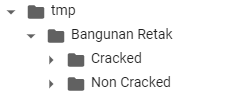

# **Data Preprocessing**

In [8]:
# Memakai library split_folders untuk membagi data train dan validasi
# import splitfolders

# Membagi data train dan validasi dengan perbandingan 80% : 20%
# splitfolders.ratio('/tmp/Bangunan Retak', output="dataset", seed=43, ratio=(.8, .2)) 

# di uncomment trus sekali run aja
#splitfolders.ratio('Bangunan Retak', output="datasets2", seed=43, ratio=(.9, .1))
# splitfolders.fixed('Bangunan Retak', output="datasets", seed=43, fixed=(1000)) # Sekali run aja
# splitfolders.fixed('C:/Users/Alfa/bangkit_program/Rusak_berat_sedang/', output="C:/Users/Alfa/bangkit_program/dataset_berat_sedang", seed=43, fixed=(100), oversample=True) # Sekali run aja
#splitfolders.fixed("E:/Dataset Bangkit/Dataset/Rusak_berat_sedang_bagus/", output="C:/Users/Alfa/bangkit_program/dataset_berat_sedang_bagus", seed=43, fixed=(100), oversample=True) # Sekali run aja



Copying files: 0 files [00:30, ? files/s]


Copying files: 1 files [00:00,  5.43 files/s]

Copying files: 4 files [00:00, 15.50 files/s]

Copying files: 7 files [00:00, 20.69 files/s]

Copying files: 10 files [00:00, 23.83 files/s]

Copying files: 14 files [00:00, 26.03 files/s]

Copying files: 18 files [00:00, 29.24 files/s]

Copying files: 22 files [00:00, 28.49 files/s]

Copying files: 25 files [00:01, 25.30 files/s]

Copying files: 28 files [00:02,  8.02 files/s]

Copying files: 31 files [00:02,  9.85 files/s]

Copying files: 34 files [00:02, 12.06 files/s]

Copying files: 38 files [00:02, 15.59 files/s]

Copying files: 41 files [00:02, 17.80 files/s]

Copying files: 44 files [00:02, 19.70 files/s]

Copying files: 47 files [00:02, 21.50 files/s]

Copying files: 51 files [00:02, 24.46 files/s]

Copying files: 55 files [00:02, 27.61 files/s]

Copying files: 59 files [00:03, 26.18 files/s]

Copying files: 63 files [00:03, 27.73 files/s]

Copying files: 66 files [00:03, 28.14 files/s

In [9]:
# Menentukan path data train dan validasi
# path = "/content/dataset/" # colab
path = "C:/Users/Alfa/bangkit_program/dataset_berat_sedang_bagus/"
train_dir = path + "train/" 
validation_dir = path + "val/"

In [10]:
print(train_dir)
print(validation_dir)

C:/Users/Alfa/bangkit_program/dataset_berat_sedang_bagus/train/
C:/Users/Alfa/bangkit_program/dataset_berat_sedang_bagus/val/


Splitting akan terlihat seperti gambar di berikut ini:
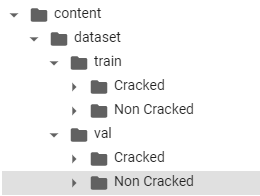

## Memasukkan Data Validasi ke dalam Array List

In [11]:
# print(os.listdir('/tmp/Bangunan Retak')) # colab
print(os.listdir('C:/Users/Alfa/bangkit_program/dataset_berat_sedang_bagus/'))

['train', 'val']


In [53]:
X = []
Z = []
# cracked = "/content/dataset/val/Cracked" # colab
# non_cracked = "/content/dataset/val/Non Cracked" # colab
rusakBerat = "C:/Users/Alfa/bangkit_program/dataset_berat_sedang_bagus/val/Rusak_Berat"
rusakSedang = "C:/Users/Alfa/bangkit_program/dataset_berat_sedang_bagus/val/Rusak_Sedang"
rumahBagus = "C:/Users/Alfa/bangkit_program/dataset_berat_sedang_bagus/val/Rumah_Bagus"

Mendefinisikan Fungsi untuk memasukkan image ke dalam list array

In [54]:
def assign_label(img, gbk): #gbk gambar ikan
    return gbk

def val_data(gbk,DIR): 
    for img in tqdm(os.listdir(DIR)):
        label= assign_label(img, gbk)
        path= os.path.join(DIR,img)
        img= cv2.imread(path,cv2.IMREAD_COLOR)
        img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Warna menjadi RGB
        img= cv2.resize(img, (100,100)) # ukuran gambar menjadi 150 x 150 pixel
        
        X.append(np.array(img))
        Z.append(str(label))
 
#print(Z)

Menggabungkan Cracked dan Non Cracked ke dalam 1 list

In [55]:
val_data('Rumah_Bagus', rumahBagus)
print(len(X))

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1562.13it/s]

100


In [56]:
val_data('Rusak_Berat', rusakBerat)
print(len(X))

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1612.54it/s]

200


In [57]:
val_data('Rusak_Sedang', rusakSedang)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 130.86it/s]

300


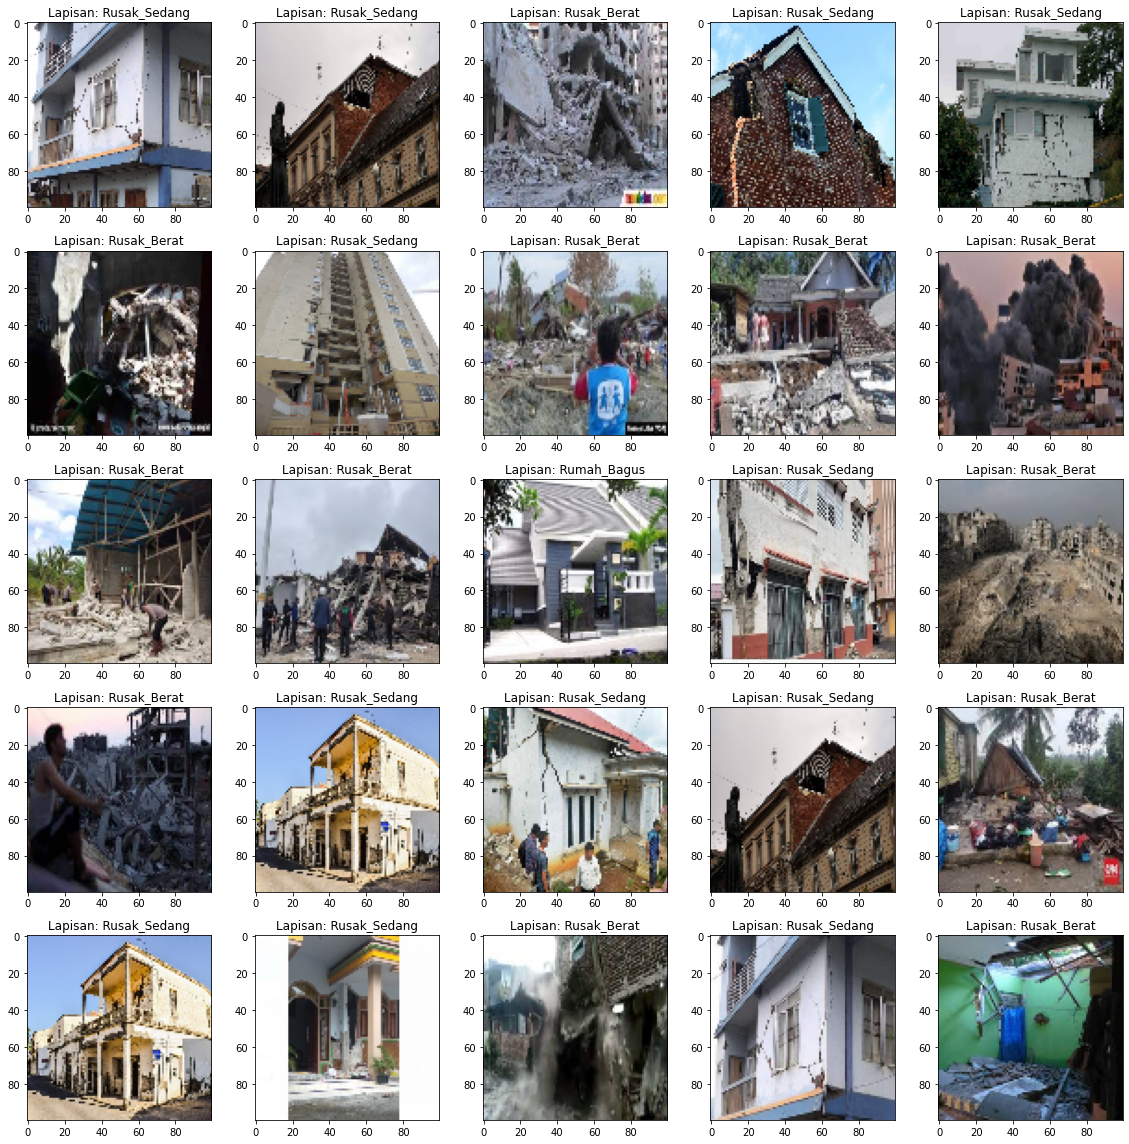

In [58]:
# Menampilkan gambar validasi dengan acak
fig,ax=plt.subplots(5,5)
fig.set_size_inches(16,16)
for i in range(5):
    for j in range (5):
        gamb=rd.randint(0,len(Z))
        ax[i,j].imshow(X[gamb])
        ax[i,j].set_title('Lapisan: '+Z[gamb])
        
plt.tight_layout()

## Augmentasi

Melakukan Augmentasi gambar untuk menciptakan data/gambar baru dari data yang telah ada

In [19]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    zoom_range = 0.1, # mengubah zoom image 
                    width_shift_range=0.1,  # mengubah image secara horizontal
                    height_shift_range=0.1, # mengubah image secara vertikal
                    #validation_split=0.15,featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False)                
 
test_datagen = ImageDataGenerator(
                    rescale=1./255
                    #,rotation_range=20,
                    #horizontal_flip=True
                    )
                   

In [25]:
batch_size = 256
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(100, 100),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        #batch_size=4,
        batch_size=16, # Model 88%
        class_mode='categorical') # karena ini merupakan masalah klasifikasi dari 2 kelas maka menggunakan class_mode = 'categorical'
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(100, 100), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        #batch_size=4,
        batch_size=16, # Model 88%
        shuffle= False,
        class_mode='categorical') # karena ini merupakan masalah klasifikasi dari 2 kelas maka menggunakan class_mode = 'categorical'

#train_steps=int(len(train_generator.labels)/batch_size)

Found 12543 images belonging to 3 classes.
Found 298 images belonging to 3 classes.


# **Modelling**

In [26]:
# Fungsi untuk menyimpan model
save_direc = os.path.join(os.getcwd(), '/content/sample_data')

model_name = 'rusak_berat_sedang_weight.h5'

# Create Directory if it doesn't exist
if not os.path.isdir(save_direc):
    os.makedirs(save_direc)
# Join the directory with the model file
modelpath = os.path.join(save_direc, model_name)

checkpoint = ModelCheckpoint(filepath = modelpath, verbose = 1, save_best_only = True,
                             save_weights_only = True, save_freq=1)

In [27]:
# Inisialisasi class untuk menghentikan proses training apabila akurasi validasi telah diatas 93%
class myCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') >= 0.885):
            print("\nAkurasi telah mencapai >88%!")
            self.model.stop_training = True
myCallBack = myCallBack()

In [28]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='Same', activation='relu',  input_shape=(100, 100, 3)),
    #tf.keras.layers.Conv2D(32, (5,5), padding='Same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (5,5), padding='Same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='Same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), # mereduksi resolusi gambar
    tf.keras.layers.Dropout(0.2), # agar model tidak overfitting

    tf.keras.layers.Conv2D(64, (3,3), padding='Same', activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), padding='Same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), # mereduksi resolusi gambar
    tf.keras.layers.Dropout(0.3), # agar model tidak overfitting

    tf.keras.layers.Conv2D(128, (3,3), padding='Same', activation='relu'),
    #tf.keras.layers.Conv2D(256, (3,3), padding='Same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), # mereduksi resolusi gambar
    tf.keras.layers.Dropout(0.3), # agar model tidak overfitting
    
    tf.keras.layers.Flatten(),
    #tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 ),
    tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),
                          activity_regularizer=regularizers.l1(0.006), bias_regularizer=regularizers.l1(0.006) ,activation='relu'), # Hidden layer
#     tf.keras.layers.Flatten(),  
    #tf.keras.layers.Dense(512, kernel_regularizer=regularizers.l2(0.0016), activation='relu'), # Hidden layer
    tf.keras.layers.Dropout(0.45, seed=123), # agar model tidak overfitting
    tf.keras.layers.Dense(3, activation='softmax') # 3 label output lalu menggunakan softmax karena model adalah klasifikasi kategori
])

# model.compile(tf.optimizers.Adamax(lr=.001), loss='categorical_crossentropy', metrics=['accuracy']) 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.RMSprop(learning_rate=0.0001), #Menggunakan optimizer rmsprop
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 100, 100, 32)      2432      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 50, 50, 64)        51264     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 50, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 25, 25, 64)       

In [29]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(32, (5,5), padding='Same', activation='relu',  input_shape=(224, 224, 3)),
#     tf.keras.layers.Conv2D(32, (5,5), padding='Same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(2, 2),

#     tf.keras.layers.Conv2D(64, (5,5), padding='Same', activation='relu'),
#     tf.keras.layers.Conv2D(64, (3,3), padding='Same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2), # mereduksi resolusi gambar
#     tf.keras.layers.Dropout(0.2), # agar model tidak overfitting

#     tf.keras.layers.Conv2D(128, (3,3), padding='Same', activation='relu'),
#     #tf.keras.layers.Conv2D(128, (3,3), padding='Same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2), # mereduksi resolusi gambar
#     tf.keras.layers.Dropout(0.3), # agar model tidak overfitting

#     tf.keras.layers.Conv2D(256, (3,3), padding='Same', activation='relu'),
#     #tf.keras.layers.Conv2D(256, (3,3), padding='Same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2), # mereduksi resolusi gambar
#     tf.keras.layers.Dropout(0.3), # agar model tidak overfitting
    
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),
#                           activity_regularizer=regularizers.l1(0.006), bias_regularizer=regularizers.l1(0.006) ,activation='relu'), # Hidden layer
#     tf.keras.layers.Dropout(0.45, seed=123), # agar model tidak overfitting
#     tf.keras.layers.Dense(1, activation='sigmoid') # 2 label output lalu menggunakan sigmoid karena model adalah klasifikasi kategori
# ])

# model.compile(loss='binary_crossentropy',
#               optimizer=tf.optimizers.RMSprop(learning_rate=0.0001), #Menggunakan optimizer rmsprop
#               metrics=['accuracy'])

# model.summary()


In [30]:
hist=model.fit(
      train_generator,
      steps_per_epoch=35,  # berapa steps yang akan dieksekusi pada setiap epoch
      epochs=300, # jumlah maksimal epoch yang akan di eksekusi
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      callbacks=[myCallBack],#, checkpoint],
      #batch_size=8, # berapa batch yang akan dieksekusi pada setiap epoch
      #validation_steps=5,  
      verbose=1)


Epoch 1/300
35/35 [==============================] - 8s 140ms/step - loss: 8.1928 - accuracy: 0.3693 - val_loss: 6.7149 - val_accuracy: 0.3020
Epoch 2/300
35/35 [==============================] - 4s 118ms/step - loss: 6.3045 - accuracy: 0.3570 - val_loss: 5.1364 - val_accuracy: 0.3322
Epoch 3/300
35/35 [==============================] - 4s 123ms/step - loss: 4.7990 - accuracy: 0.2780 - val_loss: 3.8625 - val_accuracy: 0.3356
Epoch 4/300
35/35 [==============================] - 5s 134ms/step - loss: 3.6007 - accuracy: 0.3068 - val_loss: 2.8885 - val_accuracy: 0.3289
Epoch 5/300
35/35 [==============================] - 4s 114ms/step - loss: 2.6950 - accuracy: 0.2993 - val_loss: 2.1775 - val_accuracy: 0.3624
Epoch 6/300
35/35 [==============================] - 4s 120ms/step - loss: 2.0420 - accuracy: 0.3245 - val_loss: 1.6887 - val_accuracy: 0.3725
Epoch 7/300
35/35 [==============================] - 4s 123ms/step - loss: 1.6007 - accuracy: 0.3621 - val_loss: 1.3791 - val_accuracy: 0.3356

In [32]:
model.evaluate(validation_generator)

19/19 [==============================] - 1s 31ms/step - loss: 0.4292 - accuracy: 0.9060


[0.42921075224876404, 0.9060402512550354]

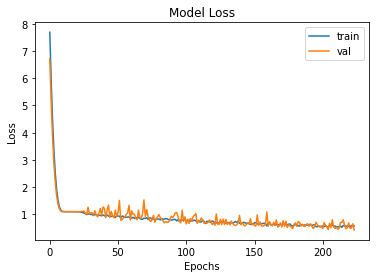

In [33]:
# Menampilkan plot loss dari model
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

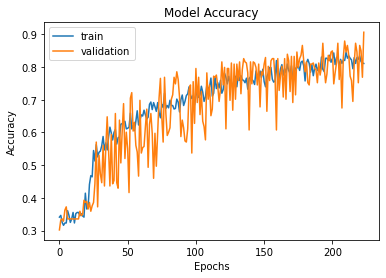

In [34]:
# Menampilkan plot akurasi dari model
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

Model Tensorflow yang sudah di training di-convert menjadi tflite menggunakan TFLiteConverter.

In [36]:
saved_model_dir = 'save_rusakBerat-Sedang-BagusTFLite/model_tflite/' # Membuat directory untuk menuimpan model
tf.saved_model.save(model, saved_model_dir) # Menyimpan model

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir) # Konversi model menjadi tflite
tflite_model = converter.convert()

with open('model_rusakBerat-Sedang-Bagus.tflite', 'wb') as f:# Membuat model tflite ke dalam directory
    f.write(tflite_model)

INFO:tensorflow:Assets written to: save_rusakBerat-Sedang-BagusTFLite/model_tflite/assets


# Save Model

In [38]:
# model.save('model_rusakBerat-Sedang-Bagus/model_rusak_berat-sedang-bagus.h5') # save model h5
# model.save_weights('model_rusakBerat-Sedang-Bagus/weightsModel_berat-sedang-bagus.h5') # save weights model
# model.save('saved_model_rusakBerat-Sedang-Bagus/') # save folder dengan pb

INFO:tensorflow:Assets written to: saved_model_rusakBerat-Sedang-Bagus/assets


Sehingga model tflite akan terlihat seperti ini:
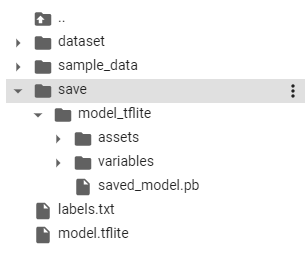

# Load Model

In [39]:
# model = tf.keras.models.load_model('model_rusakBerat-Sedang-Bagus/model_rusak_berat-sedang-bagus.h5') # Load Model
# model.load_weights('model_rusakBerat-Sedang-Bagus/weightsModel_berat-sedang-bagus.h5') # Load Model Weights
# model.summary()

# Evaluasi Model

Membuat Label untuk kelas klasifikasi

In [41]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels_berat-sedang-bagus.txt', 'w') as f:
    f.write(labels)

{'Rumah_Bagus': 0, 'Rusak_Berat': 1, 'Rusak_Sedang': 2}


In [47]:
#!cat labels.txt # Melihat isi file label berformat txt yang telah dibuat

In [43]:
# Membuat dictionary
dic = {'Rumah_Bagus': '0', 'Rusak_Berat': '1', 'Rusak_Sedang': '2'}
Z2 = [dic.get(n, n) for n in Z]

len(Z2)
#print(Z2)

300

Melabelkan array yang sudah ada di list array

In [44]:
# Melabelkan list Y menjadi 2 kategori
le= LabelEncoder()
Y= le.fit_transform(Z2)
Y= to_categorical(Y,3)

# Merubah List X menjadi Array lalu menormalisasikannya
X_test= np.array(X)
X_test= X_test/255

Evaluasi Model dengan Confusion Matrix, Precision, Recall & F1-Score

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 2 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 1 2 2 2 2 2 2 2 1 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 

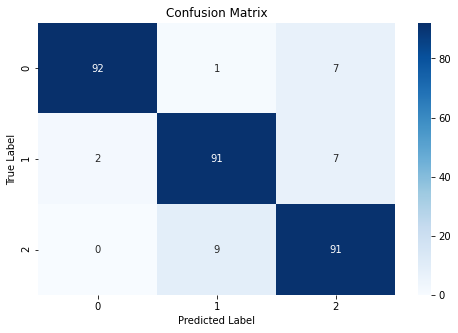

In [89]:
#Mengevaluasi model dengan confussion matrix
#from itertools import chain


pred= model.predict(X_test)
#y_pred = np.where(pred>0.5, 1, 0)
#y_pred = list(chain(*y_pred))
#y_pred = [item.replace(',', '') for item in y_pred]
#y_pred = y_pred.replace(',', '')
#y_pred = [item for sublist in y_pred for item in sublist]
y_pred= np.argmax(pred, axis=1)
y_true= np.argmax(Y, axis=1)
#y_true = np.where(Y>0.5, 1, 0)
#y_true = [item for sublist in Y for item in sublist]
print(y_pred)
print(y_true)
cm = confusion_matrix(y_true, y_pred)


f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt=".0f", ax=ax, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [69]:
# Evaluasi model dengan precision, recall & f1-score
from sklearn.metrics import classification_report
print (classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       100
           1       0.90      0.91      0.91       100
           2       0.87      0.91      0.89       100

    accuracy                           0.91       300
   macro avg       0.92      0.91      0.91       300
weighted avg       0.92      0.91      0.91       300



# **Prediksi Model**

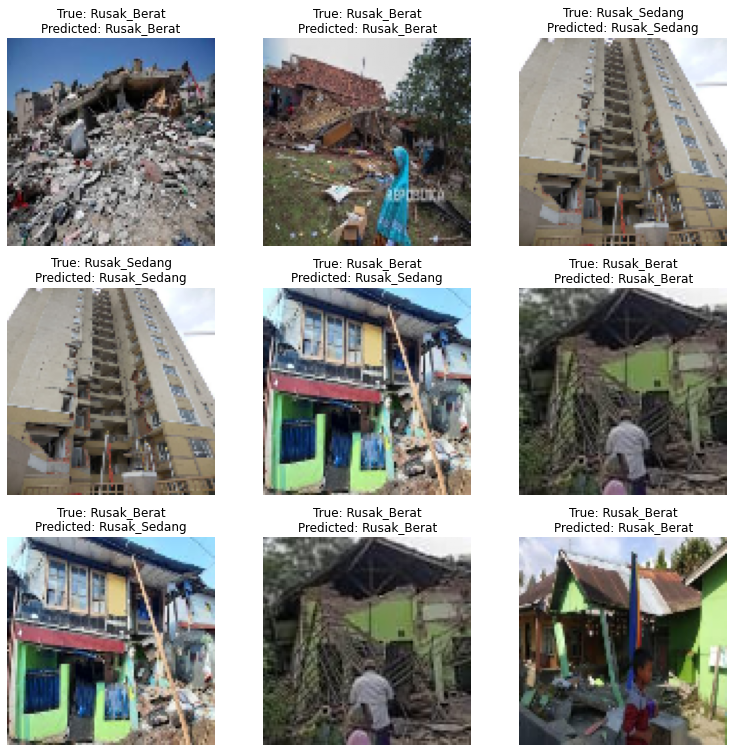

In [71]:
dict_label = {0:'Rumah_Bagus', 1:'Rusak_Berat', 2:'Rusak_Sedang'}
def predict():
    random_data = np.random.randint(low = 0, high = len(X)-1, size=6)
    sample_images = X_test[random_data]
    sample_label = Y[random_data]
    predicted = model.predict(sample_images) # Memprediksi model
    #predicted = np.where(predicted>0.5, 1, 0)
    #predicted = [item for sublist in predicted for item in sublist]
    predicted = np.argmax(predicted, axis=1) # Mengembalikan nilai terbesar dari array prediksi
    true_label = np.argmax(sample_label, axis=1) # Mengembalikan nilai terbesar dari array sample_label
    fig, axs = plt.subplots(3, 3)
    #print(predicted)
    #print(X_test)
    #print(sample_label)
    #print(true_label)
    fig.set_size_inches(13,13)
    for row in range(3):
        for col in range(3):
            if row == 0:
                true = true_label[row+col]
                pred = predicted[row+col]
                axs[row, col].imshow(sample_images[row+col])
            else:
                true = true_label[row+col+1]
                pred = predicted[row+col+1]
                axs[row, col].imshow(sample_images[row+col+1])
            axs[row, col].set_title('True: %s\nPredicted: %s' % (dict_label[true], dict_label[pred]))
            axs[row, col].axis('off')

predict()

[2]
rusak_sedang


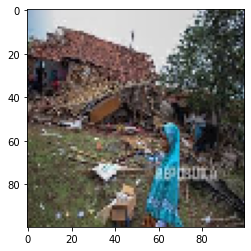

In [95]:
# Mengupload dan memprediksi gambar baru yang telah diupload
# Apabila run pertama error maka harus dirun 2x
import files
# uploaded = files.upload()
 
# for fn in uploaded.keys():
 
#   # memprediksi gambar
#     path = fn
#     img = image.load_img(path, target_size=(100,100))
#     imgplot = plt.imshow(img)
#     x = image.img_to_array(img)
#     x = np.expand_dims(x, axis=0)
 
#     images = np.vstack([x])
#     pred = model.predict(images, batch_size=10)
#     classes = np.argmax(pred,axis=1)
  
#     print(classes)
#     if classes == 0:
#         print('rusak_berat')
# #     elif classes == 1:
# #       print('rusak_berat')
# #     elif classes == 2:
# #       print('rusak_sedang')  
#     else :
#         print('rusak_sedang')
        
#uploaded = files.upload()
  
# memprediksi gambar

#path = 'test_gambar/rumah_bagus.jpg' # aman
#path = 'test_gambar/rusaksedang.jpg' # aman
path = 'test_gambar/rusakberat1 (44) - Copy - Copy - Copy.jpg'
img = image.load_img(path, target_size=(100,100))

imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
pred = model.predict(x, batch_size=3)
#classes = np.where(pred>0.5, 1, 0)
classes = np.argmax(pred,axis=1)

print(classes)
#print(pred)
if classes == 0:
    #print(pred)
    print('rumah_bagus')
elif classes == 1:
    print('rusak_berat') 
else:
    print('rusak_sedang')
  